In [16]:
import pandas as pd
import params
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime

In [17]:
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M:%S')

# import Time series dataset from config-file
argument = params.execute()
path = argument['dataset_path']

# dataset = pd.read_excel(path, names=['Date', 'Time', 'Water Level'])
# hw = pd.read_excel(path, sheet_name=None, index_col=0, parse_dates=False, date_parser=None)
# hwall.index

hw = pd.read_csv(path, index_col=0, parse_dates={'datetime': ['Datum', 'Zeit']}, date_parser=dateparse)
hw.index


DatetimeIndex(['1993-12-01 00:00:00', '1993-12-01 00:15:00',
               '1993-12-01 00:30:00', '1993-12-01 00:45:00',
               '1993-12-01 01:00:00', '1993-12-01 01:15:00',
               '1993-12-01 01:30:00', '1993-12-01 01:45:00',
               '1993-12-01 02:00:00', '1993-12-01 02:15:00',
               ...
               '2016-06-30 05:15:00', '2016-06-30 05:30:00',
               '2016-06-30 05:45:00', '2016-06-30 06:00:00',
               '2016-06-30 06:15:00', '2016-06-30 06:30:00',
               '2016-06-30 06:45:00', '2016-06-30 07:00:00',
               '2016-06-30 07:15:00', '2016-06-30 07:30:00'],
              dtype='datetime64[ns]', name='datetime', length=17043, freq=None)

<class 'pandas.core.series.Series'>


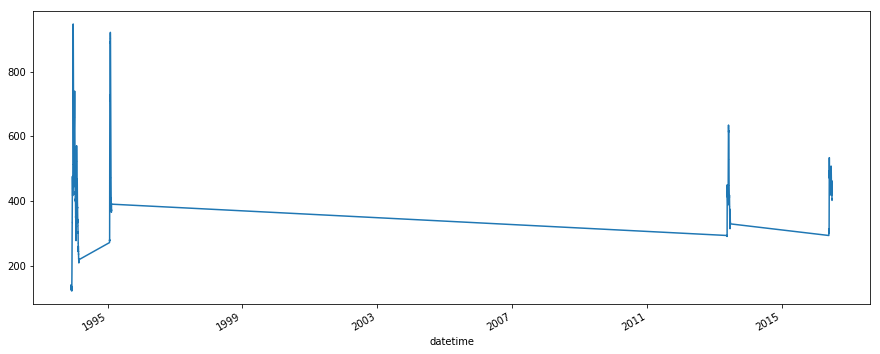

In [18]:
# convert to time series:
ts = hw['W [cm]']
ts.head(10)

# pandas.core.series.Series
print (type(ts))  
ts.plot()

datetime
1993-12-31 00:00:00    452
1993-12-31 00:15:00    453
1993-12-31 00:30:00    453
1993-12-31 00:45:00    454
1993-12-31 01:00:00    454
1993-12-31 01:15:00    454
1993-12-31 01:30:00    455
1993-12-31 01:45:00    455
1993-12-31 02:00:00    456
1993-12-31 02:15:00    456
1993-12-31 02:30:00    457
1993-12-31 02:45:00    457
1993-12-31 03:00:00    457
1993-12-31 03:15:00    458
1993-12-31 03:30:00    458
1993-12-31 03:45:00    460
1993-12-31 04:00:00    460
1993-12-31 04:15:00    461
1993-12-31 04:30:00    461
1993-12-31 04:45:00    462
1993-12-31 05:00:00    462
1993-12-31 05:15:00    462
1993-12-31 05:30:00    462
1993-12-31 05:45:00    462
1993-12-31 06:00:00    462
1993-12-31 06:15:00    462
1993-12-31 06:30:00    462
1993-12-31 06:45:00    462
1993-12-31 07:00:00    462
1993-12-31 07:15:00    461
                      ... 
1993-12-31 16:30:00    465
1993-12-31 16:45:00    465
1993-12-31 17:00:00    465
1993-12-31 17:15:00    465
1993-12-31 17:30:00    465
1993-12-31 17:45:00

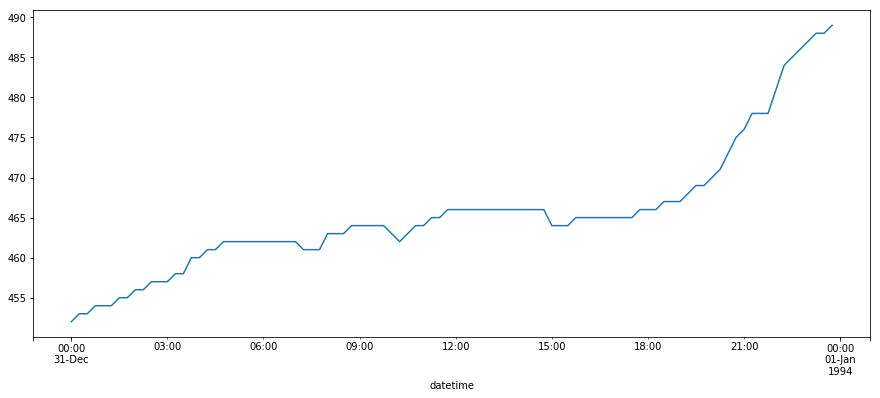

In [19]:
# get Water level in range from 00:00 to 23:45 by day
print (ts['1993-12-31 00:00:00':'1993-12-31 23:45:00'])
ts['1993-12-31 00:00:00':'1993-12-31 23:45:00'].plot()

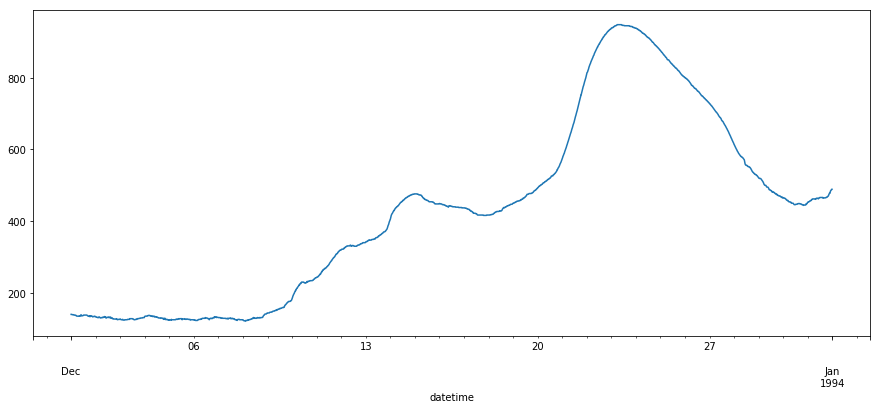

In [21]:
# get Water level until then 
# print (ts[:'1993-12-01'])
# print (ts[:'1993-12-31 23:45:00'])
ts[:'1993-12-31 23:45:00'].plot()

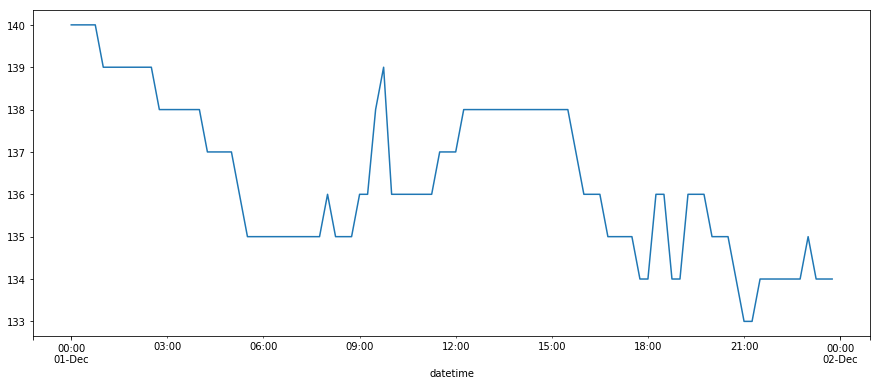

In [22]:
# Get water level by exact timing
from datetime import datetime
# print (ts['1993-12-1'])
# print (ts[datetime(1993,12,1,18,15,0)])
ts['1993-12-1'].plot()

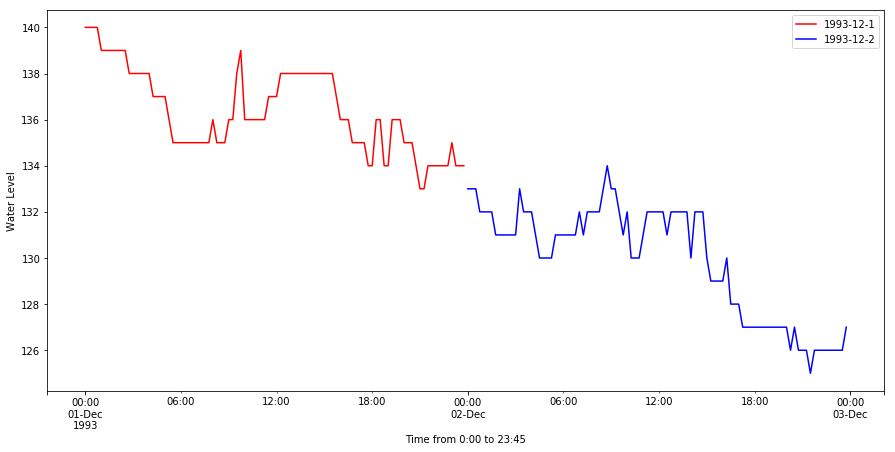

In [23]:
# Plotting water level by day
day1='1993-12-1'
day2='1993-12-2'
plt.figure(figsize=(15,7))
ts[day1].plot(label=day1, color='r')
ts[day2].plot(label=day2, color='b')
plt.xlabel('Time from 0:00 to 23:45')
plt.ylabel('Water Level')
plt.legend()

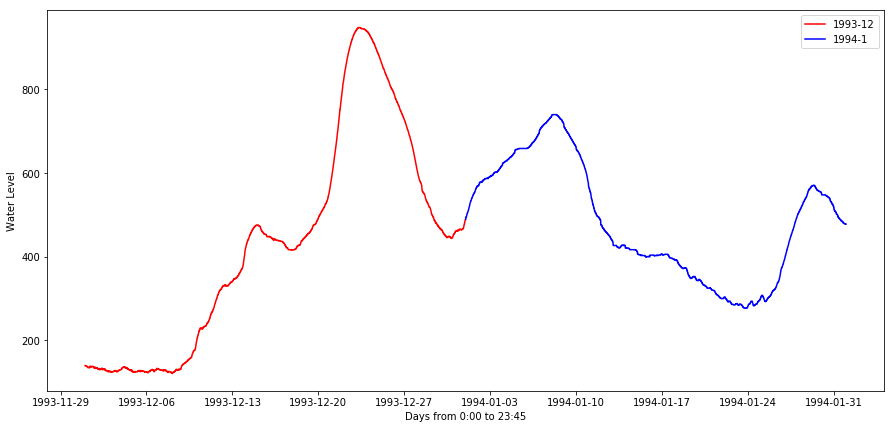

In [24]:
# Plotting water level by month
plt.figure(figsize=(15,7))
month1 = '1993-12'
month2 = '1994-1'
plt.plot(ts[month1], label=month1, color='r')
plt.plot(ts[month2], label=month2, color='b')
plt.xlabel('Days from 0:00 to 23:45')
plt.ylabel('Water Level')
plt.legend()

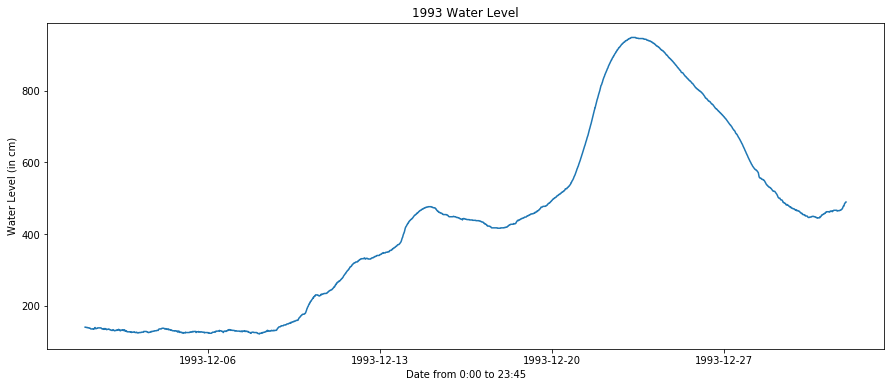

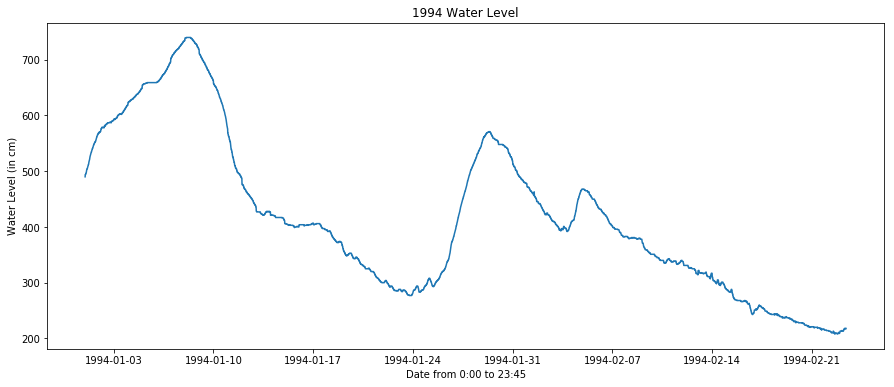

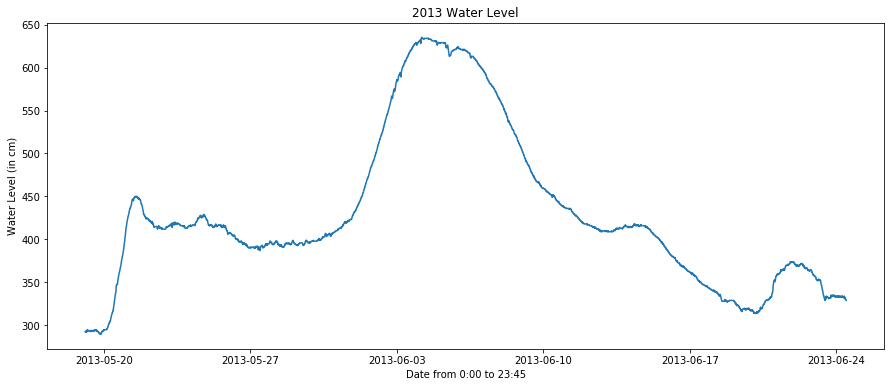

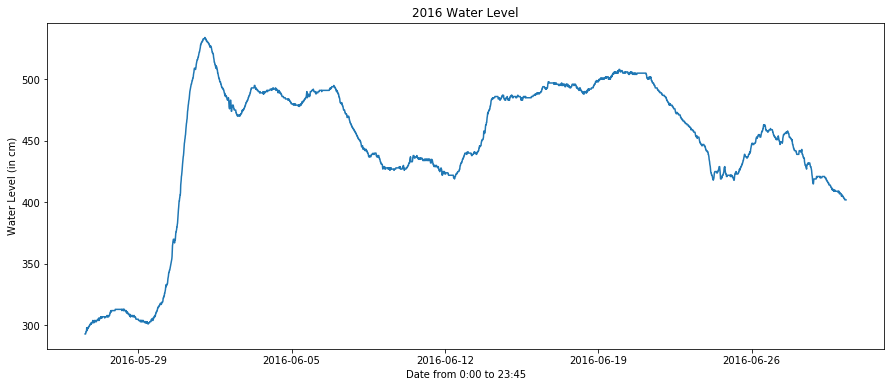

In [25]:
# Plotting water level by year
years = ['1993', '1994', '2013', '2016']

for year in years:
    plt.figure(year)
    plt.title(year+' Water Level')
    plt.plot(ts[year])
    plt.xlabel('Date from 0:00 to 23:45')
    plt.ylabel('Water Level (in cm)')

### Visualizing Histogram

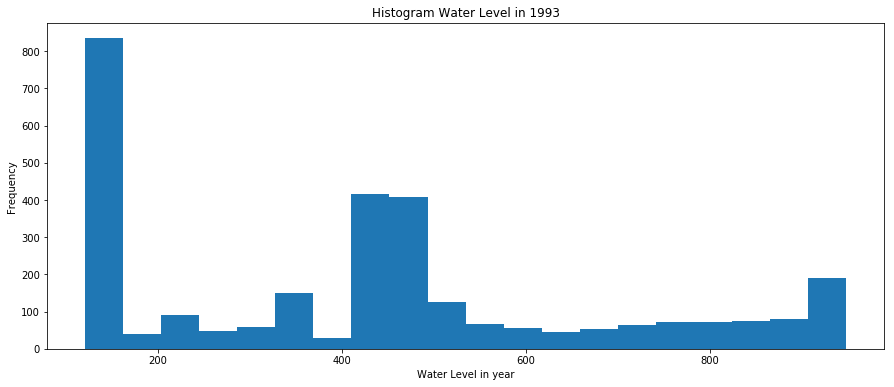

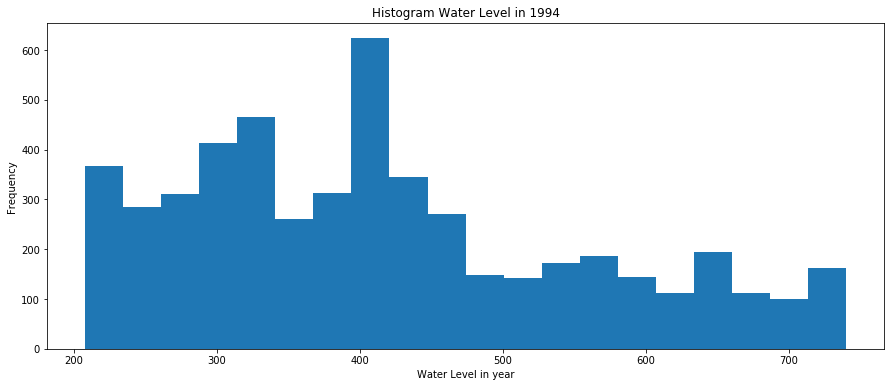

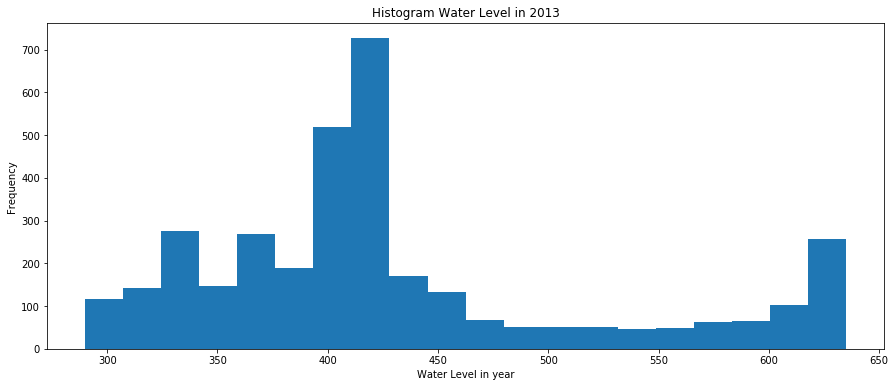

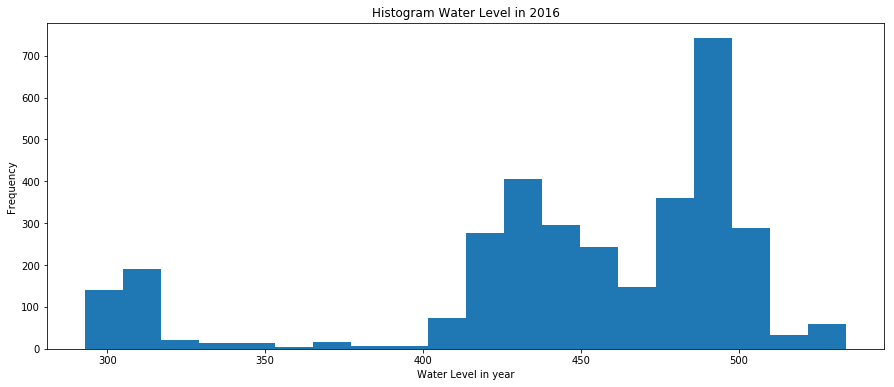

In [14]:
# By Year 1993, 1994, 2013, 2016

for year in years:
    plt.figure(year)
    plt.title('Histogram Water Level in '+year)
    plt.hist(ts[year], bins=20)
    plt.xlabel('Water Level in year')
    plt.ylabel('Frequency')

### Testing stationarity by Year